In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("Salary Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
df=pd.read_csv("mobile_prices_2023.csv")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [6]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [38]:
##numerical_data= df.select_dtypes(include=["int","float"])
##for x in categorical_data:
   ## df[x].fillna(df[x].mean()[0], inplace=True)
##df.isnull().sum()

In [8]:
## filling missing values that are categorical.
categorical_data= df.select_dtypes(include=["object","category"])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0], inplace=True)
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [9]:
## removing puntuation marks 
df["Price in INR"]= df["Price in INR"].str.replace(",","")
df["Price in INR"]= df["Price in INR"].str.replace("₹","")
df["Number of Ratings"]= df["Number of Ratings"].str.replace(",","")
df["Price in INR"]= pd.to_numeric(df["Price in INR"])
df["Number of Ratings"]=pd.to_numeric(df["Number of Ratings"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   int64  
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1836 non-null   object 
 5   Back/Rare Camera   1836 non-null   object 
 6   Front Camera       1836 non-null   object 
 7   Battery            1836 non-null   object 
 8   Processor          1836 non-null   object 
 9   Price in INR       1836 non-null   int64  
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 157.9+ KB


In [10]:
df.head(5)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17


In [11]:
## convert categorical to numerical
encoder= LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,746,4.2,33561,16,14,171,26,78,187,5649,0
1,789,4.2,77128,25,20,118,32,78,173,11999,0
2,748,4.3,15175,25,20,172,26,78,106,6999,0
3,750,4.2,22621,25,20,137,26,78,193,7749,0
4,747,4.3,15175,25,20,172,26,78,106,6999,0


In [12]:
## splitting the dataset between x and y, x(independent) which are multiple variable and y (dependent) which is only
## one variable
X=df.drop(["Price in INR"],axis=1)
y=df["Price in INR"]

In [13]:
print(X.isnull().sum())

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Date of Scraping     0
dtype: int64


In [14]:
X.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Date of Scraping
0,746,4.2,33561,16,14,171,26,78,187,0
1,789,4.2,77128,25,20,118,32,78,173,0
2,748,4.3,15175,25,20,172,26,78,106,0
3,750,4.2,22621,25,20,137,26,78,193,0
4,747,4.3,15175,25,20,172,26,78,106,0


In [15]:
y.head()

0     5649
1    11999
2     6999
3     7749
4     6999
Name: Price in INR, dtype: int64

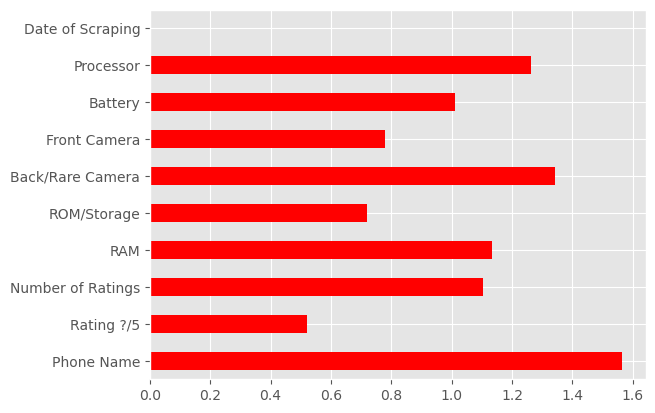

In [16]:
## the mutual importance between each features
plt.style.use("ggplot")
importance= mutual_info_regression(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="red")
plt.show()

In [17]:
## splitting the dataset into training and testing set
xtrain,xtest,ytrain,ytest=train_test_split(X,y, test_size=0.2,random_state=1)

In [18]:
##from sklearn.pipeline import pipeline
LinearModel=Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())])
LinearModel.fit(xtrain,ytrain)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [19]:
pred1=LinearModel.predict(xtest)
pred1

array([ 3.09322168e+04,  3.72279975e+04,  3.32348742e+04,  1.76005273e+04,
        3.86593758e+04,  9.39553665e+03,  1.99560569e+04,  2.21384330e+04,
        2.11334887e+03,  2.20479428e+04,  2.44293145e+04,  3.08396963e+04,
        1.14675239e+04,  1.42061333e+04, -6.04110322e+03,  3.99319337e+04,
        2.57262453e+04,  3.16468414e+04,  1.77122623e+04,  3.25989433e+04,
        1.65748486e+04,  1.63697139e+04,  7.09390271e+04,  1.11860620e+04,
        1.22305552e+04,  2.54575864e+04,  6.62853153e+04,  1.87194383e+04,
        9.77064990e+03,  2.62201423e+04,  1.98641986e+04,  4.55823547e+04,
        3.19349640e+03,  6.06564818e+04, -2.50477349e+02,  5.34226039e+02,
        2.85090685e+04,  9.50617644e+03,  3.45372101e+03,  1.11674189e+04,
        6.56442650e+04,  2.30862971e+04,  7.83518183e+03,  1.14582023e+04,
        1.72451155e+04,  3.09028450e+04,  1.12151032e+04,  3.43582366e+04,
        3.40345324e+04,  1.72663052e+04,  3.58553318e+04,  7.68046185e+03,
        1.67993461e+04,  

In [20]:
print("MAE",mean_absolute_error(ytest,pred1))
print("MAPE",mean_absolute_percentage_error(ytest,pred1))
print("MSE",mean_squared_error(ytest,pred1))
print("R2 SCORE",r2_score(ytest,pred1))

MAE 13737.99219635259
MAPE 1.6216722035676847
MSE 362139163.78688395
R2 SCORE 0.270678346717936


In [21]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred1

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
556,20999,30932.216810
1386,1250,37227.997455
1450,16499,33234.874226
111,14999,17600.527312
1787,15999,38659.375837
...,...,...
790,13999,12318.398017
846,10990,10719.659721
654,13499,24256.319003
1084,36600,21244.687460


In [22]:
tree=DecisionTreeRegressor()
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [23]:
pred2=tree.predict(xtest)
pred2

array([ 20999.        ,   1617.5       ,  16499.        ,  17499.        ,
        15999.        ,   6999.        ,  10499.        ,  11999.        ,
         8999.        ,  25999.        ,  36990.        ,  27990.        ,
        15499.        ,   9999.        ,  24990.        ,  16999.        ,
        14999.        ,  36999.        ,  25999.        ,  32299.        ,
        32499.        ,   7199.        ,  69999.        ,  13999.        ,
         1865.        ,  11999.        ,  80999.        ,  50330.        ,
        48990.        ,  27999.        ,   9499.        ,   3440.        ,
        42999.        , 100999.        ,   5999.        ,  12999.        ,
        17499.        ,  27990.        ,   6999.        ,  13999.        ,
        71999.        ,  13499.        ,   8799.        ,  15499.        ,
         8298.        ,  23999.        ,  13999.        ,   1899.        ,
        14990.        ,  22800.        ,  13999.        ,  13999.        ,
        32990.        ,  

In [24]:
print("MAE",mean_absolute_error(ytest,pred2))
print("MAPE",mean_absolute_percentage_error(ytest,pred2))
print("MSE",mean_squared_error(ytest,pred2))
print("R2 SCORE",r2_score(ytest,pred2))

MAE 1978.8808876811593
MAPE 0.25507817154273466
MSE 49764197.70840881
R2 SCORE 0.8997785642198285


In [25]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred2

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
556,20999,20999.0
1386,1250,1617.5
1450,16499,16499.0
111,14999,17499.0
1787,15999,15999.0
...,...,...
790,13999,12988.0
846,10990,10990.0
654,13499,13499.0
1084,36600,46990.0


In [26]:
forest=RandomForestRegressor()
forest.fit(xtrain,ytrain)

RandomForestRegressor()

In [27]:
pred4=forest.predict(xtest)
pred4

array([ 22125.41      ,   2037.83055556,  17483.82      ,  15809.83      ,
        16526.94      ,   7182.82      ,  10292.09      ,  12025.33      ,
         8904.93      ,  27705.05      ,  53641.956     ,  29279.66      ,
        15193.91      ,  10473.71      ,  29925.55      ,  16753.82      ,
        14490.04      ,  43497.12      ,  25806.28      ,  36006.63      ,
        28635.73333333,   7048.72      ,  70319.        ,  14023.92      ,
         1873.95686508,  10174.63      ,  80819.        ,  42832.77      ,
        43917.565     ,  27054.76666667,   9396.24      ,  14579.145     ,
        30609.68      , 101979.        ,   6680.33      ,  13207.91      ,
        19043.3       ,  28748.54      ,  19035.        ,  13913.91      ,
        72626.        ,  13742.28      ,   9795.3       ,  15189.        ,
        10661.98      ,  27402.29      ,  12485.36      ,   2031.325     ,
        15275.48      ,  22902.03      ,  14268.37      ,  13837.91      ,
        31257.475     ,  

In [28]:
print("MAE",mean_absolute_error(ytest,pred4))
print("MAPE",mean_absolute_percentage_error(ytest,pred4))
print("MSE",mean_squared_error(ytest,pred4))
print("R2 SCORE",r2_score(ytest,pred4))

MAE 2459.5538363418736
MAPE 0.28210776269329946
MSE 34364645.44047956
R2 SCORE 0.9307921303925808


In [29]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred4

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
556,20999,22125.410000
1386,1250,2037.830556
1450,16499,17483.820000
111,14999,15809.830000
1787,15999,16526.940000
...,...,...
790,13999,11661.890000
846,10990,11085.390000
654,13499,13670.450000
1084,36600,45918.400000


<Axes: xlabel='Price in INR'>

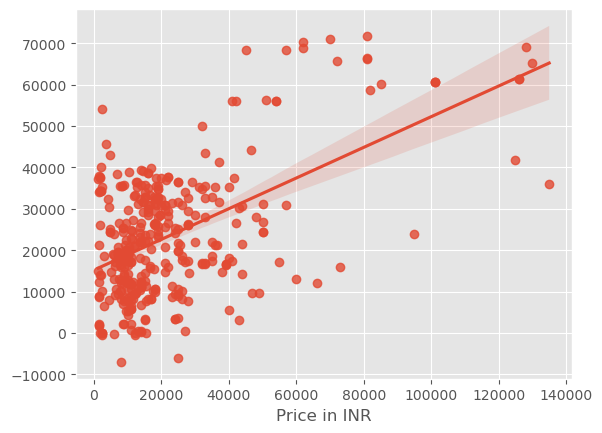

In [30]:
sns.regplot(x= ytest,y=pred1)

<Axes: xlabel='Price in INR'>

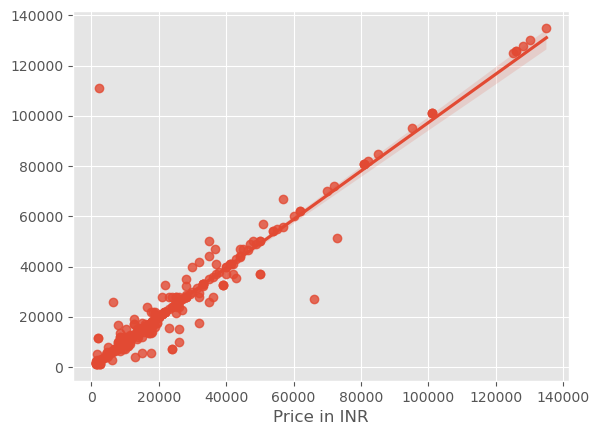

In [31]:
sns.regplot(x= ytest,y=pred2)

<Axes: xlabel='Price in INR'>

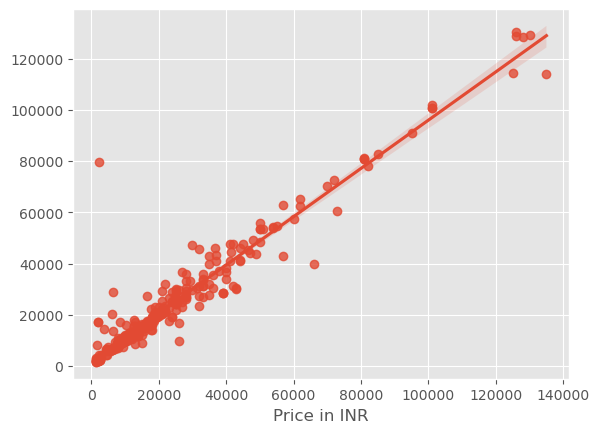

In [32]:
sns.regplot(x= ytest,y=pred4)

In [33]:
ml=MLPRegressor()
ml.fit(xtrain,ytrain)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [34]:
pred5=ml.predict(xtest)
pred5

array([31676.88273106, 19704.07977665, 19766.85062148, 14477.17460468,
       16254.80059035, 13629.62577495, 23599.06616881, 15258.34516573,
       14889.23742866, 14186.93340352, 22553.33407526, 15143.41038016,
       22774.59449838, 10892.18351727, 26746.65529973, 16439.71230687,
       23558.84137592, 12794.55257825, 21552.3107482 , 32944.60630094,
       28275.47535742, 29613.26138884,  5608.54638569, 15659.06268042,
        7682.69321032, 11087.99169572,  5870.21135983, 26971.73636538,
       27045.2081492 , 16591.448345  ,  9648.97991494, 14252.08545221,
       19749.9718413 ,  6193.35652613, 12076.35781242, 18724.53137747,
       21888.83673126, 24580.21629363,  9442.18832023, 15658.01033721,
       10799.09449562, 17288.60823579, 18893.00147781, 22782.02297758,
       27099.82127471, 15961.40351595, 21724.33631269, 23156.27494603,
       23684.00221289, 31912.88392285, 16452.41709437, 26175.52787749,
       22041.63132401, 32125.881762  , 26391.4868505 , 19829.32566126,
      

In [35]:
print("MAE",mean_absolute_error(ytest,pred5))
print("MAPE",mean_absolute_percentage_error(ytest,pred5))
print("MSE",mean_squared_error(ytest,pred5))
print("R2 SCORE",r2_score(ytest,pred5))

MAE 13212.5780695278
MAPE 1.073818632923841
MSE 541887286.4340143
R2 SCORE -0.09132115814782371


In [36]:
outcome= { 
    "Actual price":ytest,
    "Predicted price":pred5

}
df3=pd.DataFrame(outcome)
df3

,Actual price,Predicted price
556,20999,31676.882731
1386,1250,19704.079777
1450,16499,19766.850621
111,14999,14477.174605
1787,15999,16254.800590
...,...,...
790,13999,18820.744739
846,10990,7947.082755
654,13499,25809.883234
1084,36600,30103.415293


<Axes: xlabel='Price in INR'>

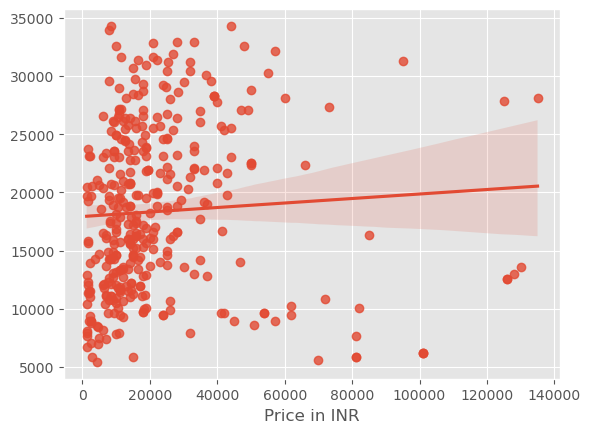

In [37]:
sns.regplot(x= ytest,y=pred5)